In [1]:
from Functions import *
%run EnergyModel_DB.ipynb
from neuralflow import energy_model
import matplotlib.pyplot as plt, matplotlib.gridspec as gridspec
import pickle
import sys
sys.path.append('/Users/daniel/Downloads/Engel Lab Stuff')
import os
import random as rand

In [15]:
# Cell 1: initialize EnergyModel with the ramping dynamics and generate 50 trials of data from it.

# Specifies the parameters of the EnergyModel: ramping dynamics (linear potential), narrow 
# zero-centered p0(x) distribution, 2 neurons with linear and non-linear firing rate functions
EnergyModelParams={
               'peq_model': {'model': 'double_well', 'params': {'xmin': 0.5, 'xmax': 0.0, 'depth': 8}},
               'p0_model':{"model": "single_well", "params": {"miu": 200, "xmin": 0}},
               'D': 0.56,
               'firing_model':{'model': 'rectified_linear', 'params': {'r_slope': 100.0, 'x_thresh': -1}},
               'boundary_mode':'reflecting',    
               'verbose':True
               }

# Create an instance of EnergyModel class
# em_data_gen = energy_model.EnergyModel(**EnergyModelParams)
em_data_gen = energy_model.EnergyModel(**EnergyModelParams)



In [16]:
# Generate spike data from this model
num_trial = 500
# trials = [rand.uniform(0,1) for i in range(num_trial)]
# trials = np.append(trials,0)
# trials=sorted(trials)
# print(trials)
trial_start = np.zeros(num_trial) #[trials[i] for i in range(num_trial)]
trial_end = np.ones(num_trial) #[trials[i+1] for i in range(num_trial)]
data_ISI, time_bins, diff_traj = em_data_gen.generate_data(deltaT=0.00001,trial_start=trial_start,trial_end=trial_end)

100%|█████████████████████████████████████████| 500/500 [13:10<00:00,  1.58s/it]


In [17]:
# Cell 2

EnergyModelParams={
                'peq_model':{"model": "uniform", "params": {}},
                'p0_model':{"model": "single_well", "params": {"miu": 200, "xmin": 0}},
                'D': 0.56,
                'firing_model':{'model': 'rectified_linear', 'params': {'r_slope': 100.0, 'x_thresh': -1}},
                'boundary_mode':'reflecting',    
                'verbose':True
                # 'boundary_mode':'reflecting',  
                # 'p0_model':{"model": "single_well", "params": {"miu": 200, "xmin": 0}},
                # 'firing_model':[{"model": "linear", "params": {"r_slope": 50, "r_bias": 60}}],
                # 'verbose':True
               }
em_fitting = energy_model.EnergyModel(**EnergyModelParams)


In [18]:
# Cell 3

# Define optimization parameters: number of iterations and learning rate
learning_rate = 0.05
number_of_iterations = 10

# Define optimization options
options={}
options['data']={'dataTR':data_ISI}#,'dataCV':data_ISI}
# options['optimization']={'gamma':{'F':learning_rate},'max_iteration':number_of_iterations}
# options['optimization']= {'gamma':{'F':learning_rate,'F0':learning_rate,'Fr':learning_rate,'C':learning_rate,'D':learning_rate},'max_iteration':number_of_iterations}

#  beta1=0.9, beta2=0.999, epsilon=1e-08

# Let us reinitialize the model to reset the initial guess paramters (it is useful if you want to execute this cell more
# than 1 time)
# Fit the model
####
#['F','D','F0','Fr','C']
options['optimization']= {'gamma':{'params_to_opt':['F'],'alpha':learning_rate,'beta1':0.9,'beta2':0.999,'epsilon':10**(-8)},'max_iteration':number_of_iterations}
em_fitting = energy_model.EnergyModel(**EnergyModelParams)
e = em_fitting.fit(data = options['data'], optimizer = 'ADAM',optimization = options['optimization'],save={'path':"/Users/daniel/PycharmProjects/Engel_Rotation_Project/Data/Jan23_1",'stride':1})





Performing Estimation of the model parameters...
The chosen optimizer is: ADAM
Epoch 1, Iteration 0
Epoch 2, Iteration 0
Epoch 3, Iteration 0
Epoch 4, Iteration 0
Epoch 5, Iteration 0
Epoch 6, Iteration 0
Epoch 7, Iteration 0
Epoch 8, Iteration 0
Epoch 9, Iteration 0
Epoch 10, Iteration 0
Optmization finished


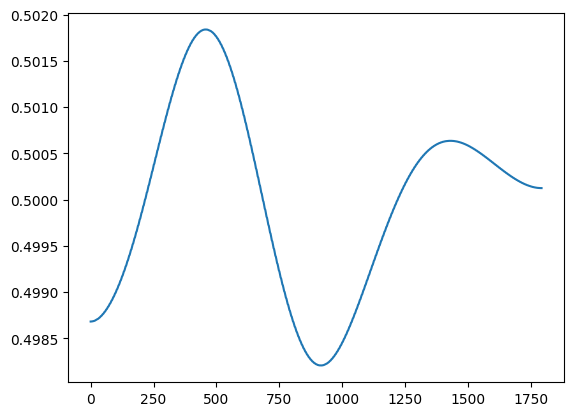

In [22]:
plt.plot(em_fitting.peq_[0,:])
#plt.plot(em_data_gen.peq_[0,:])
plt.show()

In [128]:
em_fitting.D_

array([0.56])

AttributeError: 'EnergyModel' object has no attribute 'iterations_GD_'